## Support Vector Regression

**Importing the Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Importing the dataset**

In [45]:
dataset = pd.read_csv('position_salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [46]:
X=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values

In [47]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [48]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [49]:
y=y.reshape(-1,1)

In [50]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


**Feature Scaling**

In [51]:
from sklearn.preprocessing import StandardScaler
sc_x =StandardScaler()
sc_y =StandardScaler()
X_train = sc_x.fit_transform(X)
y_train=sc_y.fit_transform(y).reshape(-1,)

In [52]:
print(X_train)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [53]:
print(y_train)

[-0.72004253 -0.70243757 -0.66722767 -0.59680786 -0.49117815 -0.35033854
 -0.17428902  0.17781001  0.88200808  2.64250325]


**Training the SVR model on the whole dataset**

In [54]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train,y_train)

SVR()

**Predicting a new result**

In [55]:
input = sc_x.transform([[6.5]])
transformed_y = regressor.predict(input)
sc_y.inverse_transform([transformed_y])


array([[170370.0204065]])

**Visualising the SVR results**

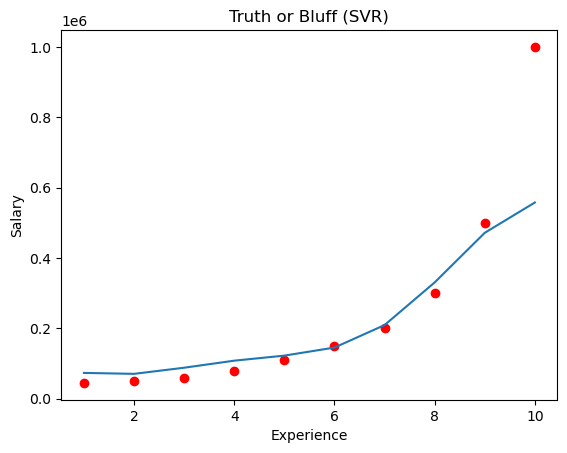

In [62]:
y_pred_transformed = regressor.predict(X_train)
y_pred = sc_y.inverse_transform([y_pred_transformed]).reshape(-1,1)

plt.scatter(X,y,c='red')
plt.plot(X,y_pred)
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Experience')
plt.ylabel('Salary');

**Visualising the SVR results (for higher resolution and smoother curve)**

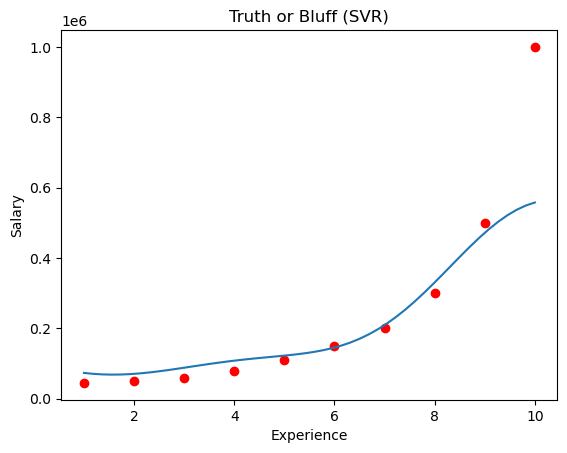

In [70]:
X_hr = np.linspace(X_train.min(),X_train.max(),50).reshape(-1,1)
y_pred_transformed = regressor.predict(X_hr)
y_pred = sc_y.inverse_transform([y_pred_transformed]).reshape(-1,1)

plt.scatter(X,y,c='red')
plt.plot(sc_x.inverse_transform(X_hr),y_pred)
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Experience')
plt.ylabel('Salary');